Giuseppe Lorenzo Pompigna

i6233748

# Data Analysis

# Clinic1: Exploratory Data Analysis

## DELIVERABLES (DEADLINE 17/February late night, wildcards possible)

Instructions for the deliverable: 

* Make sure that you include a proper amount/mix of comments, results and code.

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. Enjoy!

* Honor code applies to these tasks. Only individual work should be submitted.

* Data science is a collaborative activity. While you may talk with others about the clinic, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*

1. God
2. Teddy bear
3. Mom
**_order not relevant_**

### Learning goals

By completing and delivering the clinic tasks you will know how to :

* Load files and check their integrity
* Identifying the type of data collected, missing values, anomalies, etc.
* Wrangle data for analysis
* Parse columns in the dataframe to create new dataframe columns
* Use EDA to learn more about your data
* Create and interpret informative visualizations to explore the data set

## 0: Introduction to the Problem

We would like to help a business man in the city of Rome (let's call this guy Pim). Pim wants to introduce a scooter rental system for people to drive around the city. He got some data from a pilot that was conducted in the city and now he would like to know more about the users and be able to draw insights from this data. 

In this clinic, you will perform tasks to clean, visualize, and explore the user data. You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

### 0.1 A note on the basic EDA workflow

Before we move to the actual clinic tasks, a reminder about the basic EDA workflow:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

### 0.2 Grading

The clinic is broken down to several sub-questions so that they help you solve the tasks in an iterative way but also to facilitate grading. 

For responses that require numerical answers and some comment/discussion (free response), readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

For plots, you should abide to the basic principles as we have discussed in class. Note that for ALL plotting questions from here on out (also for other clinics), we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?


### Score breakdown per sub-question

| Question    | Points |
|-------------|--------|
| Question 1a | 2      |
| Question 1b | 1      |
| Question 1c | 2      |
| Question 1d | 4      |
| Question 2a | 2      |
| Question 2b | 2      |
| Question 2c | 1      |
| Question 2d | 1      |
| Question 2e | 2      |
| Question 2f | 2      |
| Question 3a | 5      |
| Question 3b | 3      |
| Question 4  | 3      |
| Question 5a | 2      |
| Question 5b | 2      |
| Question 6a | 1      |
| Question 6b | 4      |
| Question 6c | 3      |
| Question 6d | 2      |
| Question 7a | 4      |
| Question 7b | 4      |
| Total       | 52     |

Your final score out of 52 will be scaled down to 1 and be your final grade for this clinic.

In [3]:
from math import log

# First things first
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as  mpatches
import zipfile

from numpy import divide
from scipy.stats import mode

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

### 0.3 Loading the data

The data we are exploring is collected at a period between 2011-2012 in Rome.

The variables in this data frame are defined as:

| Variable   | Description                                                                                             |
|------------|---------------------------------------------------------------------------------------------------------|
| instant    | record index                                                                                            |
| dteday     | date                                                                                                    |
| season     | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter                                                    |
| yr         | year (0: 2011, 1:2012)                                                                                  |
| mnth       | month ( 1 to 12)                                                                                        |
| hr         | hour (0 to 23)                                                                                          |
| holiday    | whether day is holiday or not                                                                           |
| weekday    | day of the week                                                                                         |
| workingday | if day is neither weekend nor holiday                                                                   |
| weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow |
| temp       | normalized temperature in Celsius (divided by 41)                                                       |
| atemp      | normalized "feels-like" temperature in Celsius (divided by 50)                                          |
| hum        | normalized percent humidity (divided by 100)                                                            |
| windspeed  | normalized wind speed (divided by 67)                                                                   |
| casual     | count of casual users                                                                                   |
| registered | count of registered users                                                                               |
| cnt        | count of total users including casual and registered                                                    |

The following code loads the data into a Pandas `DataFrame'.

In [4]:
# Run this cell to load the data.  No further action is needed
full = pd.read_csv('data/clientnumbers.txt')
full.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Below, we show the shape of the file. You should see that the size of the DataFrame matches the number of lines in the file, minus the header row.

In [5]:
full.shape

(17379, 17)

---
## 1: Data Preparation
A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

In this exercise we will *mutate* the data frame, **overwriting the corresponding variables in the data frame.** However, our notebook will effectively document this in-place data transformation for future readers. Make sure to leave the underlying datafile `clientnumbers.txt` unmodified.

### Question 1
#### Question 1a (Decoding `weekday`, `workingday`, and `weathersit`)

Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  Hint: There are fewer holidays...
1. `weekday`: It turns out that Monday is the day with the most holidays.  Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values. Assume `0` corresponds to `Sun`, `1` to `Mon` and so on.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`.

**Note:** If you want to revert changes, run the cell that reloads the file.

**Hint:**  One approach is to use the [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method of the pandas DataFrame class. We haven't discussed how to do this so you'll need to look at the documentation. The most concise way is with the approach described in the documentation as "nested-dictonaries", though there are many possible solutions.

In [6]:
#your code for 1a goes here
df_dict = {'holiday':{0: 'no',1: 'yes'},
              'weekday':{0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri', 6: 'Sat',7: 'Sun'},
              'workingday':{0:'no', 1:'yes'},
              'weathersit':{1:'Clear',2:'Mist',3:'Light',4:'Heavy'}
              }
full = full.replace(df_dict)
full

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,no,Mon,yes,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,no,Mon,yes,Clear,0.26,0.2727,0.56,0.1343,13,48,61


#### Question 1b (Holidays)

How many entries in the data correspond to holidays?  Set the variable `num_holidays` to this value.

In [7]:
#Code for 1b goes here
num_holidays = (full['holiday'])[full['holiday'] == 'yes'].count()
num_holidays

500

#### Question 1c (Computing Daily Total Counts)

The granularity of this data is at the hourly level.  However, for some of the analysis we will also want to compute daily statistics.  In particular, in the next few questions we will be analyzing the daily number of registered and unregistered users.

Construct a data frame named `daily_counts` indexed by `dteday` with the following columns:
* `casual`: total number of casual users for each day
* `registered`: total number of registered users for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

**Hint**: `groupby` and `agg`. For the `agg` method, please check the [documentation](https://pandas.pydata.org/docs/reference/groupby.html) for examples on applying different aggregations per column. If you use the capability to do different aggregations by column, you can do this task with a single call to `groupby` and `agg`. For the `workingday` column we can take any of the values since we are grouping by the day, thus the value will be the same within each group. Take a look at the `'first'` or `'last'` aggregation functions.

In [8]:
###code for 1c goes here
daily_counts = full[['dteday','casual','registered','workingday']]
daily_counts = daily_counts.groupby('dteday').agg({'casual':'sum', 'registered':'sum','workingday':'first'})
daily_counts

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes
...,...,...,...
2012-12-27,247,1867,yes
2012-12-28,644,2451,yes
2012-12-29,159,1182,no


#### Question 1d (Identifying issues with the data)

Inspect the variables (based on the codebook) and identify potential issues with one (or more) of them. Think about missing values, mistakes, outliers, errors etc. Correct these and justify your answers accordingly.

In [9]:
###code for 1d goes here
print("Check duplicates..\n",True in full['instant'].duplicated())
print("Check null values..\n",full.isnull().values.any())       # no null values (ok)
print("Check NaN values..\n",full.isna().values.any())         # no NaN values (ok)

# check negative values
print("Check minimum values..\n",full.min(axis=0, numeric_only=True))                 # no negative values (ok)

# notice:
# min(casual) == 0
# min(registered) == 0
# min(cnt) == 1
# something wrong happening

# check total count of users
wrong_count = full["cnt"] != full['casual'] + full['registered']

# correction
full.loc[wrong_count, 'cnt'] = full.loc[wrong_count, 'casual'] + full.loc[wrong_count, 'registered']
print("Check corrected cnt values..\n",full[wrong_count])

# check max values
print("Check max values..\n",full.max(axis=0, numeric_only=True))                 # no weird values (ok)

Check duplicates..
 False
Check null values..
 False
Check NaN values..
 False
Check minimum values..
 instant       1.00
season        1.00
yr            0.00
mnth          1.00
hr            0.00
temp          0.02
atemp         0.00
hum           0.00
windspeed     0.00
casual        0.00
registered    0.00
cnt           1.00
dtype: float64
Check corrected cnt values..
        instant      dteday  season  yr  mnth  hr holiday weekday workingday  \
15717    15718  2012-10-22       4   1    10   2      no     Mon        yes   
15718    15719  2012-10-22       4   1    10   3      no     Mon        yes   
15719    15720  2012-10-22       4   1    10   4      no     Mon        yes   

      weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
15717      Clear  0.38  0.3939  0.71        0.0       1           0    1  
15718      Clear  0.40  0.4091  0.62        0.0       1           0    1  
15719      Clear  0.38  0.3939  0.66        0.0       1         896  897  
Check m

As we can see for these three entries the count doesn't properly add up between casual and registered users,
one option could be to increase the 0s found in the registered column to match (count - casual) but it would be incoherent with the (896) entry, hence most reasonable solution would be to update count to be the exact sum, or skip these entries.

---
## 2: Exploring the Distribution of Users

Let's begin by comparing the distribution of the daily counts of casual and registered users. The following questions require some heavy plotting. Below we are summarizing some functions (should be updated on the latest versions). 

### Matplotlib and Seaborn Table of Common Functions

`x` and `y` are sequences of values (i.e. arrays, lists, or Series).

| Function | Description |
| -------- | ----------- |
| `plt.plot(x, y)` | Creates a line plot of `x` against `y` |
| `plt.title(name)` | Adds a title `name` to the current plot |
| `plt.xlabel(name)` | Adds a label `name` to the x-axis |
| `plt.ylabel(name)` | Adds a label `name` to the y-axis |
| `plt.scatter(x, y)` | Creates a scatter plot of `x` against `y` |
| `plt.hist(x, bins=None)` | Creates a histogram of `x`; `bins` can be an integer or a sequence |
| `plt.bar(x, height)` | Creates a bar plot of categories `x` and corresponding heights `height` |
| `sns.histplot(data, x, y, hue, kde)` | Creates a distribution plot; `data` is a DataFrame; `x`, `y` are column names in `data` that specify positions on the x and y axes; `hue` is a column name in `data` that adds subcategories to the plot based on `hue`; `kde` is a boolean that determines whether to overlay a KDE curve |
|`sns.lineplot(data, x, y, hue)` | Creates a line plot |
|`sns.scatterplot(data, x, y, hue, size)` | Creates a scatter plot; `size` is a vector that contains the size of point for each subcategory based on `hue` |
|`sns.kdeplot(x, y)` |  Creates a kernel density estimate plot; `x`, `y` are series of data that indicate positions on the `x` and `y` axis |
|`sns.jointplot(x, y, data, kind)` | Creates a joint plot of 2 variables with KDE plot in the middle and a distribution plot for each variable on the sides; `kind` determines the visualization type for the distribution plot, can be `scatter`, `kde` or `hist` |

**Note**: This list of functions and parameters is **not** exhaustive. You may need to reference and explore more documentation to answer the following questions, but we will help you through that process. 

### Question 2
#### Question 2a

Use the [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) function to create a plot that overlays the distribution of the daily counts of bike users, using blue to represent `casual` riders, and green to represent `registered` riders. The temporal granularity of the records should be daily counts, which you should have after completing question 1c.

**Hint:** You will need to set the `stat` parameter appropriately to match the desired plot.

Include a legend, xlabel, ylabel, and title. Read the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to add these. After creating the plot, look at it and make sure you understand what the plot is actually telling us, e.g on a given day, the most likely number of registered riders we expect is ~4000, but it could be anywhere from nearly 0 to 7000.

**Update 13/2: distplot is deprecated, work with displot or histplot instead**

CASUAL     -> mean:848.1764705882352, median:713.0, mode:[120]
REGISTERED -> mean:3657.129958960328, median:3662.0, mode:[1707]


C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_24644\3680120109.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mo1 = mode(daily_counts.casual, axis=None);   mo2 = mode(daily_counts.registered, axis=None)


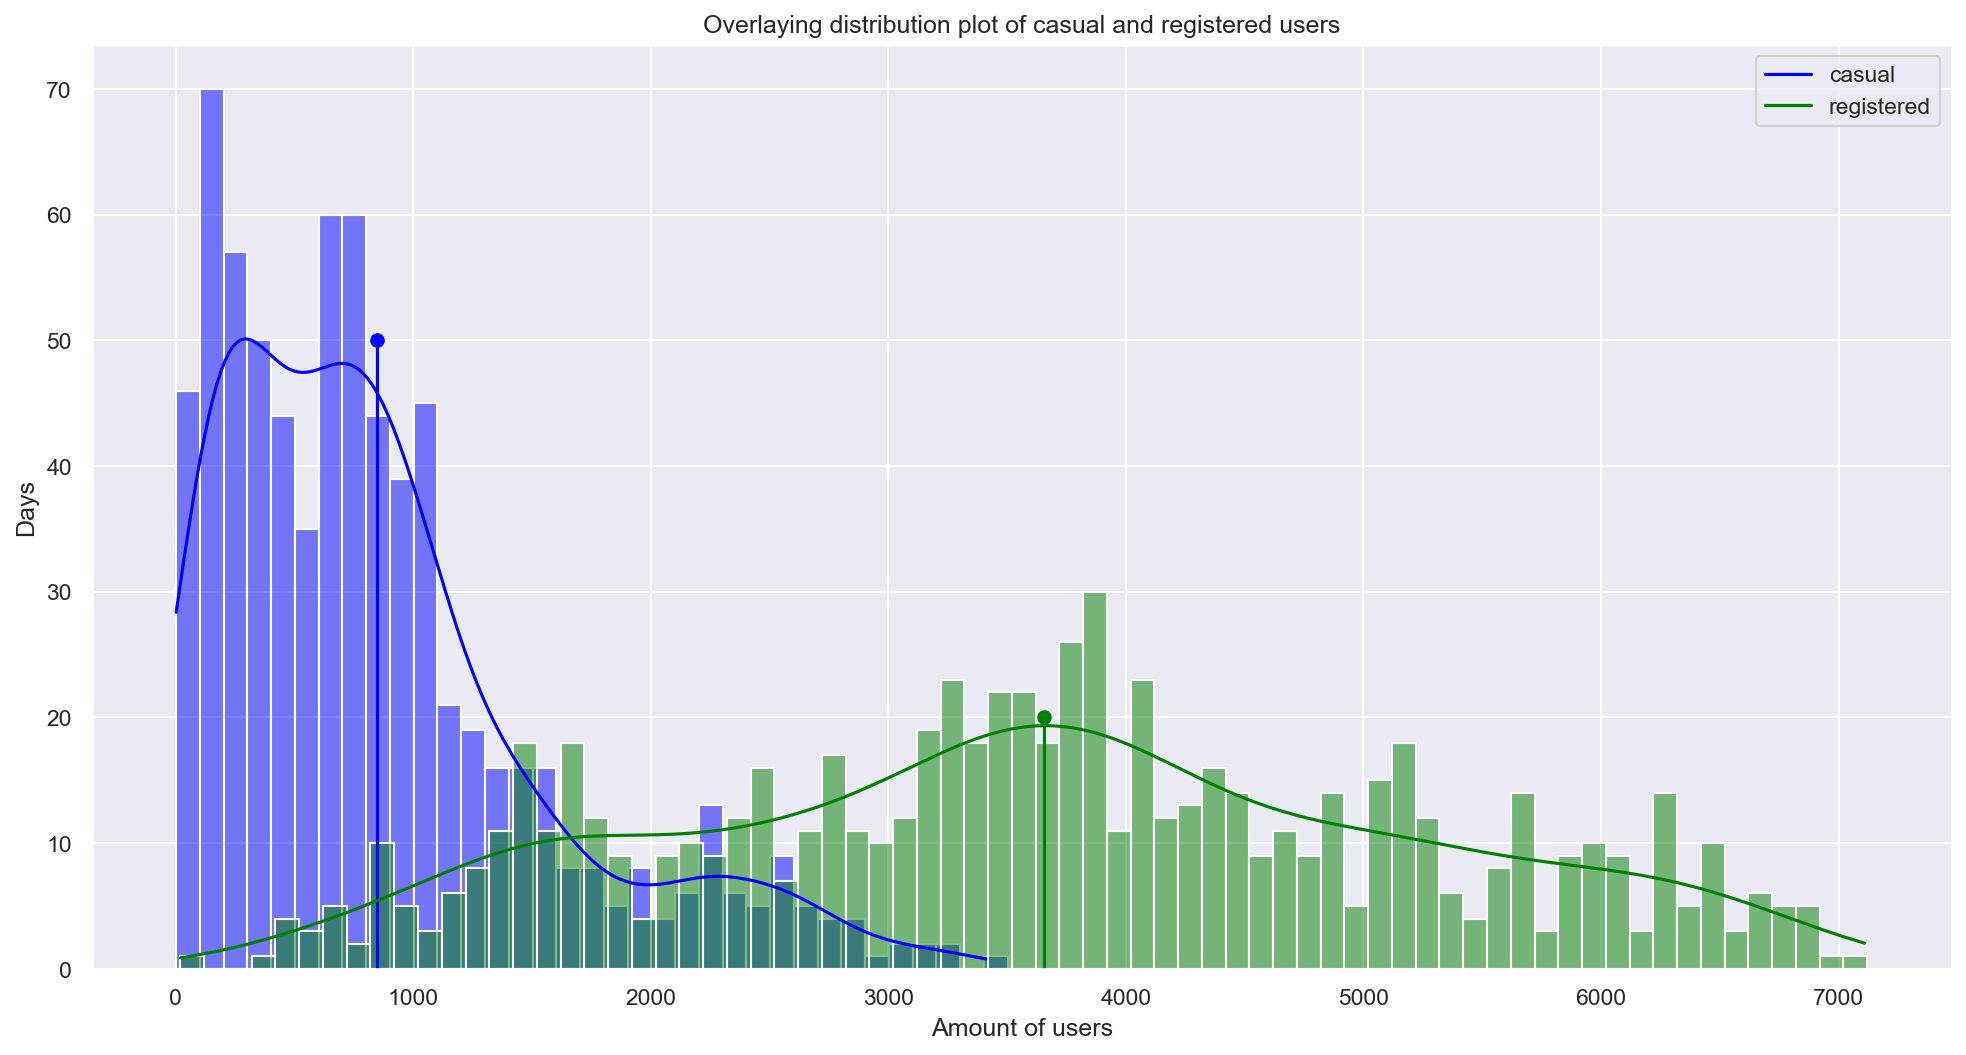

In [10]:
#code for 2a goes here
# get mean, median and mode for both distributions
mu1 = daily_counts.casual.mean(); mu2 = daily_counts.registered.mean()
me1 = daily_counts.casual.median(); me2 = daily_counts.registered.median()
mo1 = mode(daily_counts.casual, axis=None);   mo2 = mode(daily_counts.registered, axis=None)

print(f"CASUAL     -> mean:{mu1}, median:{me1}, mode:{mo1.mode}")
print(f"REGISTERED -> mean:{mu2}, median:{me2}, mode:{mo2.mode}")

# plot histogram of casual users with stem at mean value
f1 = sns.histplot(data=daily_counts.casual,binwidth=100, color="blue", legend="casual", kde=True)
plt.stem(mu1, 50, label="Casual mean", linefmt="blue")
# plot histogram of registered users with stem at mean value
f2 = sns.histplot(data=daily_counts.registered,binwidth=100, color="green", legend="registered", kde=True)
plt.stem(mu2, 20, label="Registered mean", linefmt="green")

plt.title("Overlaying distribution plot of casual and registered users")
plt.xlabel("Amount of users"); plt.ylabel("Days"); plt.legend(["casual", "registered"]);

### Question 2b

In the cell below, descibe the differences you notice between the density curves for casual and registered users.  Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers.  Include a comment on the spread of the distributions. 

The casual users density curve is skewed to the right, $\mu_{casual} = 858.18$, and the mean is the largest, while mode the smallest compared to the median, hence the mean reflects the skewing the most. The curve tail is smoothly decreasing around the 3000 users and it seems there are not gaps or outliers.


The registered users density curve is visibly more symmetrical (no skewed), and has mean more centered $ \mu_{registered} = 3657.13 $, and it's fairly near to the median, although the evaluated mode seems wrong (maybe multimodal) from the plot it is clear the peak being around the stem which is placeholder for the mean value. Both curve tails are almost symmetrical too, smoothly decreasing around the extremes and there seems to be one gap around 100-300 users which might be inspected further. No outliers can be found here.


### Question 2c

In addition to the type of user (casual vs. registered) and the overall count of each, what other kinds of demographic data would be useful (e.g. identity, neighborhood, monetary expenses, etc.)? 

A possible option could be analysing demographic data such as age:
since the average use, frequency and budget of younger versus older users is fairly different, it would be relevant to study whether there is correlation between the two subsets or whether it would be more productive to focus mainly on a single category.

### Question 2d

What is an example of a privacy or consent issue that could occur when accessing the demographic data you brought up in the previous question?

<!--
BEGIN QUESTION
name: q2d
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

*** fancy answer goes here ***
Data would have to comply to GDPR regulations, hence it wouldn't be possible to know the exact age of the users surveyed, or else it would fall under illegality.
The age must be asked and stored in a range e.g.: (<25yo, >25yo)


### Question 2e

The density plots do not show us how the counts for registered and casual users vary together. Use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. This time, let's use the `full` DataFrame to plot hourly counts instead of daily counts.

The `lmplot` function will also try to draw a linear regression line. Color the points in the scatterplot according to whether or not the day is working day. There are many points in the scatter plot so make them small to help reduce overplotting. Also make sure to set `fit_reg=True` to generate the linear regression line. You can set the `height` parameter if you want to adjust the size of the `lmplot`. Make sure to include a title.

**Hints (updated):** 
* Checkout this helpful [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html).

* You will need to set `x`, `y`, and `hue` and the `scatter_kws` in the `sns.lmplot` call.

* You will need to call [`plt.title`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html) to add a title for the graph.

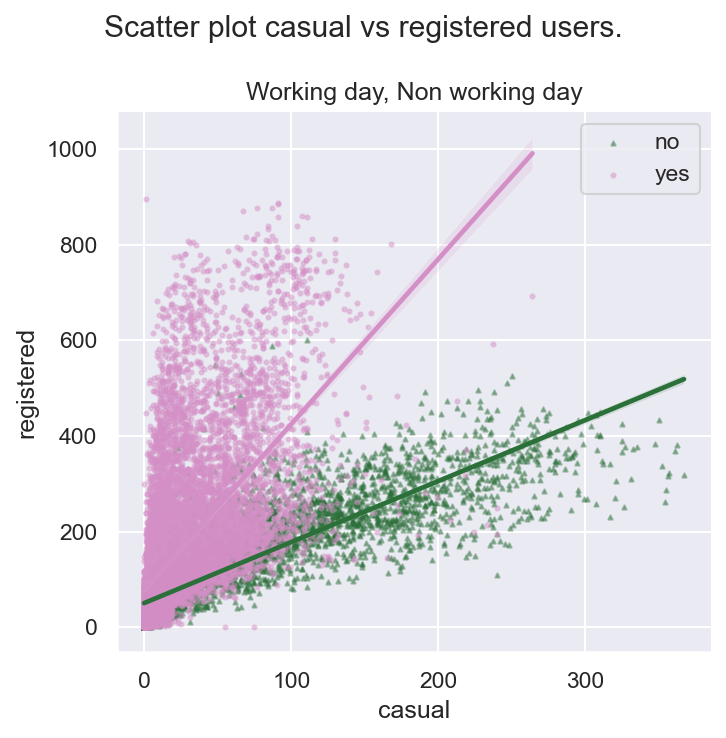

In [11]:
#code to 2e goes here
sns.set_palette("cubehelix", n_colors=2, color_codes=True)
# scatter plot with hue
f3 = sns.lmplot(data=full,x="casual",y="registered",legend=False, hue="workingday",markers=['^','o'],scatter_kws={"s":4, "alpha":0.4},fit_reg=True)
# Depending on the setup, you might want to make the font size a bit bigger

plt.legend()
plt.suptitle("Scatter plot casual vs registered users.")
plt.title("Working day, Non working day")
plt.tight_layout()

### Question 2f

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered users and whether or not the day is a working day or not? What effect does [overplotting](https://www.displayr.com/what-is-overplotting/) have on your ability to describe this relationship?

There might be high correlation between the two variables because it can be seen the red line: line fit for non working days overlaps a big slice of working days (Blue data points), hence may be reasonable to think there are quite a few records from the non working days (Red data points) being hidden by the other ones.

---
## 3: Visualization

### Question 3

#### Question 3a Bivariate Kernel Density Plot
 
To address overplotting, we will try visualizing the data with another technique, the bivariate kernel density estimate.

You will want to read up on the documentation for `sns.kdeplot` which can be found [`here`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

You can think of this plot as an overhead countour or topographical map, where the "high" regions are those with more data points, and "low" regions are those with fewer data points.

A basic kde plot of all the data is quite easy to generate. However, this plot includes data from working and non-working days, which isn't what we want. Check the code below for how to generate a simple KDE plot. Adjust any variable names, if you have to.

Text(0.5, 1.0, 'KDE plot of Casual and Registered users')

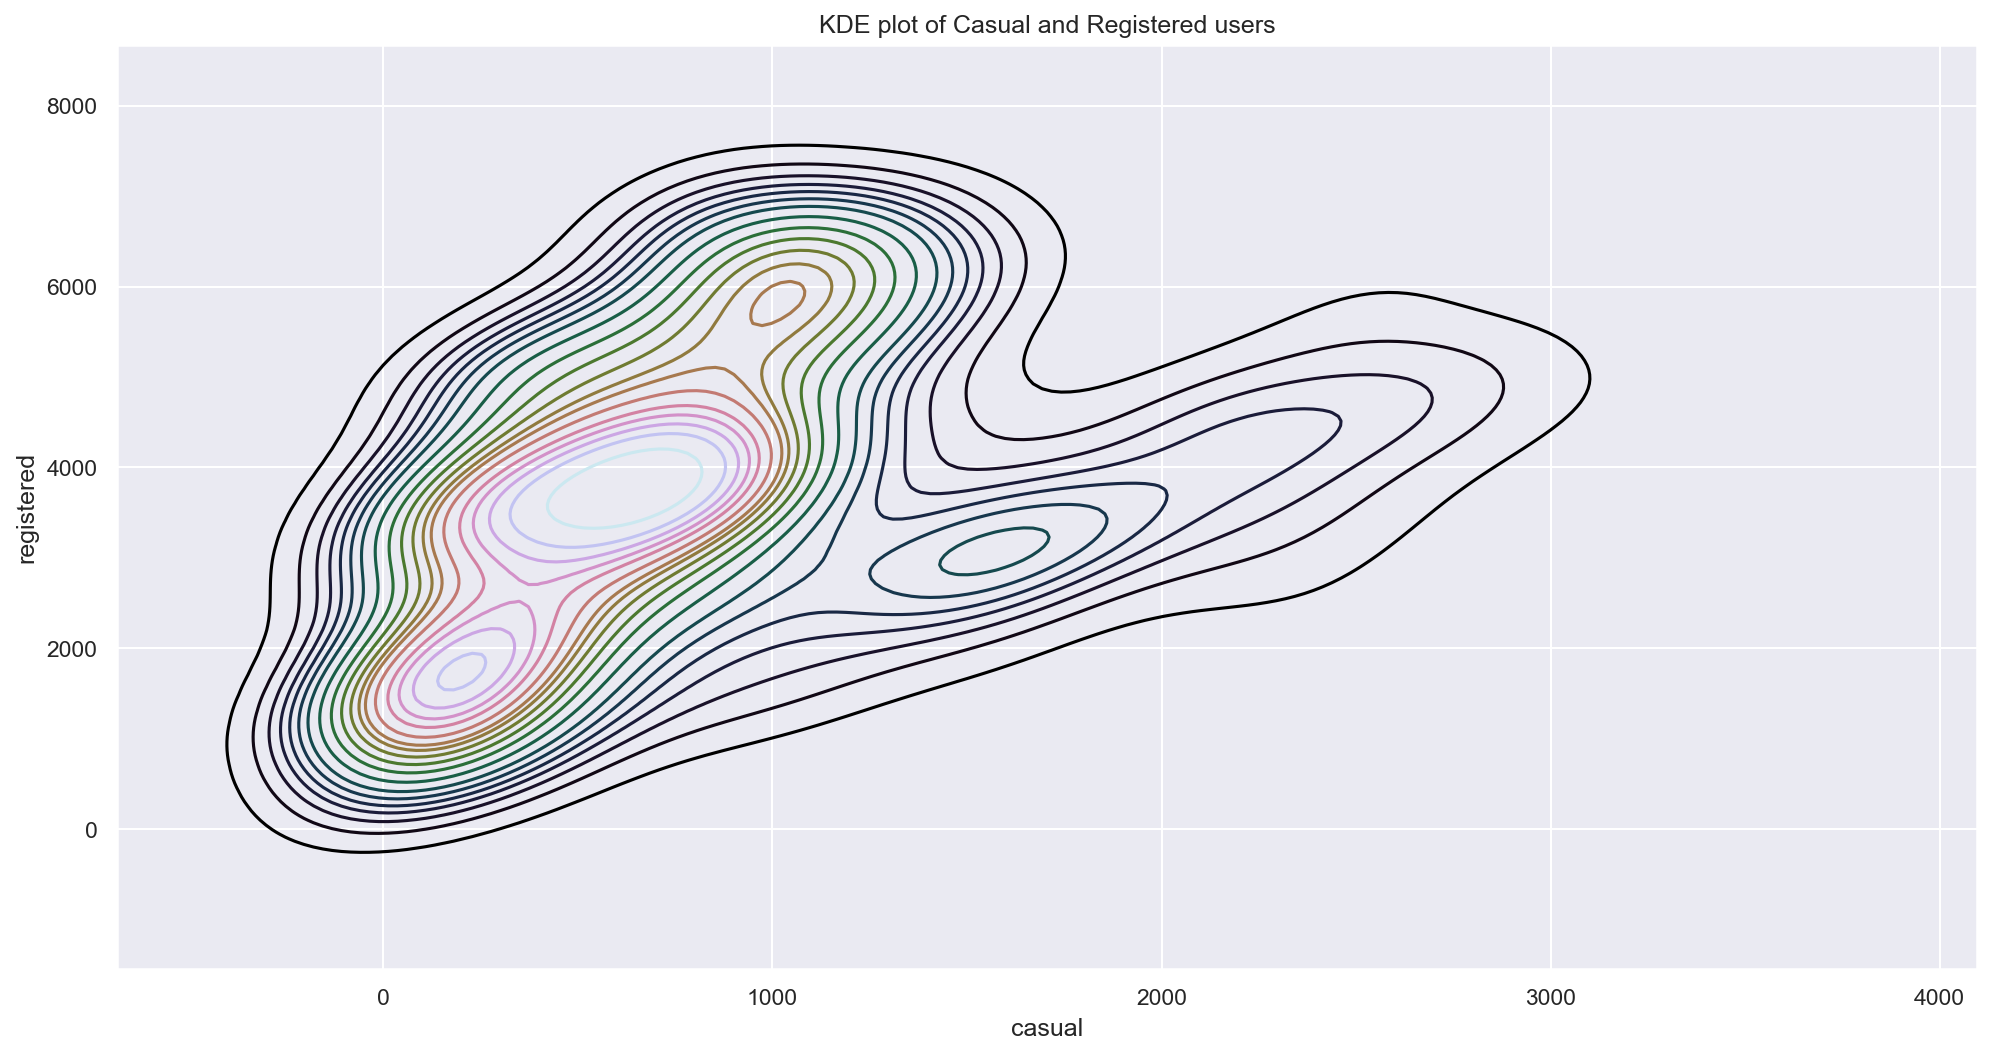

In [12]:
# it could work just by adding the hue variable actually
sns.kdeplot(data=daily_counts, x='casual', y='registered',cmap='cubehelix',levels=20, fill=False)
plt.title("KDE plot of Casual and Registered users")
# sns.kdeplot(data=daily_counts, x='casual', y='registered',hue="workingday", levels=10, shade=False)

Generating the plot with working and non-working days separated can be complicated so we will provide a walkthrough below, feel free to use whatever method you wish however if you do not want to follow the walkthrough.

**Hints (updated):** 
* You can use `loc` with a boolean array and column names at the same time
* You will need to call kdeplot twice, each time drawing different data from the `daily_counts` table.
* Check out this [guide](https://matplotlib.org/stable/tutorials/introductory/usage.html) to see an example of how to create a legend. In particular, look at how the example in the guide makes use of the `label` argument in the call to `plt.plot()` and what the `plt.legend()` call does. This is a good exercise to learn how to use examples to get the look you want.
* You will want to set the `cmap` parameter of `kdeplot` to `"Reds"` and `"Blues"` (or whatever two contrasting colors you'd like), and also set the `label` parameter to address which type of day you want to plot. You are required for this question to use two sets of contrasting colors for your plots.

After you get your plot working, experiment by setting `shade=True` in `kdeplot` to see the difference between the shaded and unshaded version. Please submit your work with `shade=False`. 

Text(0.5, 1.0, 'Working days, Non-Working days')

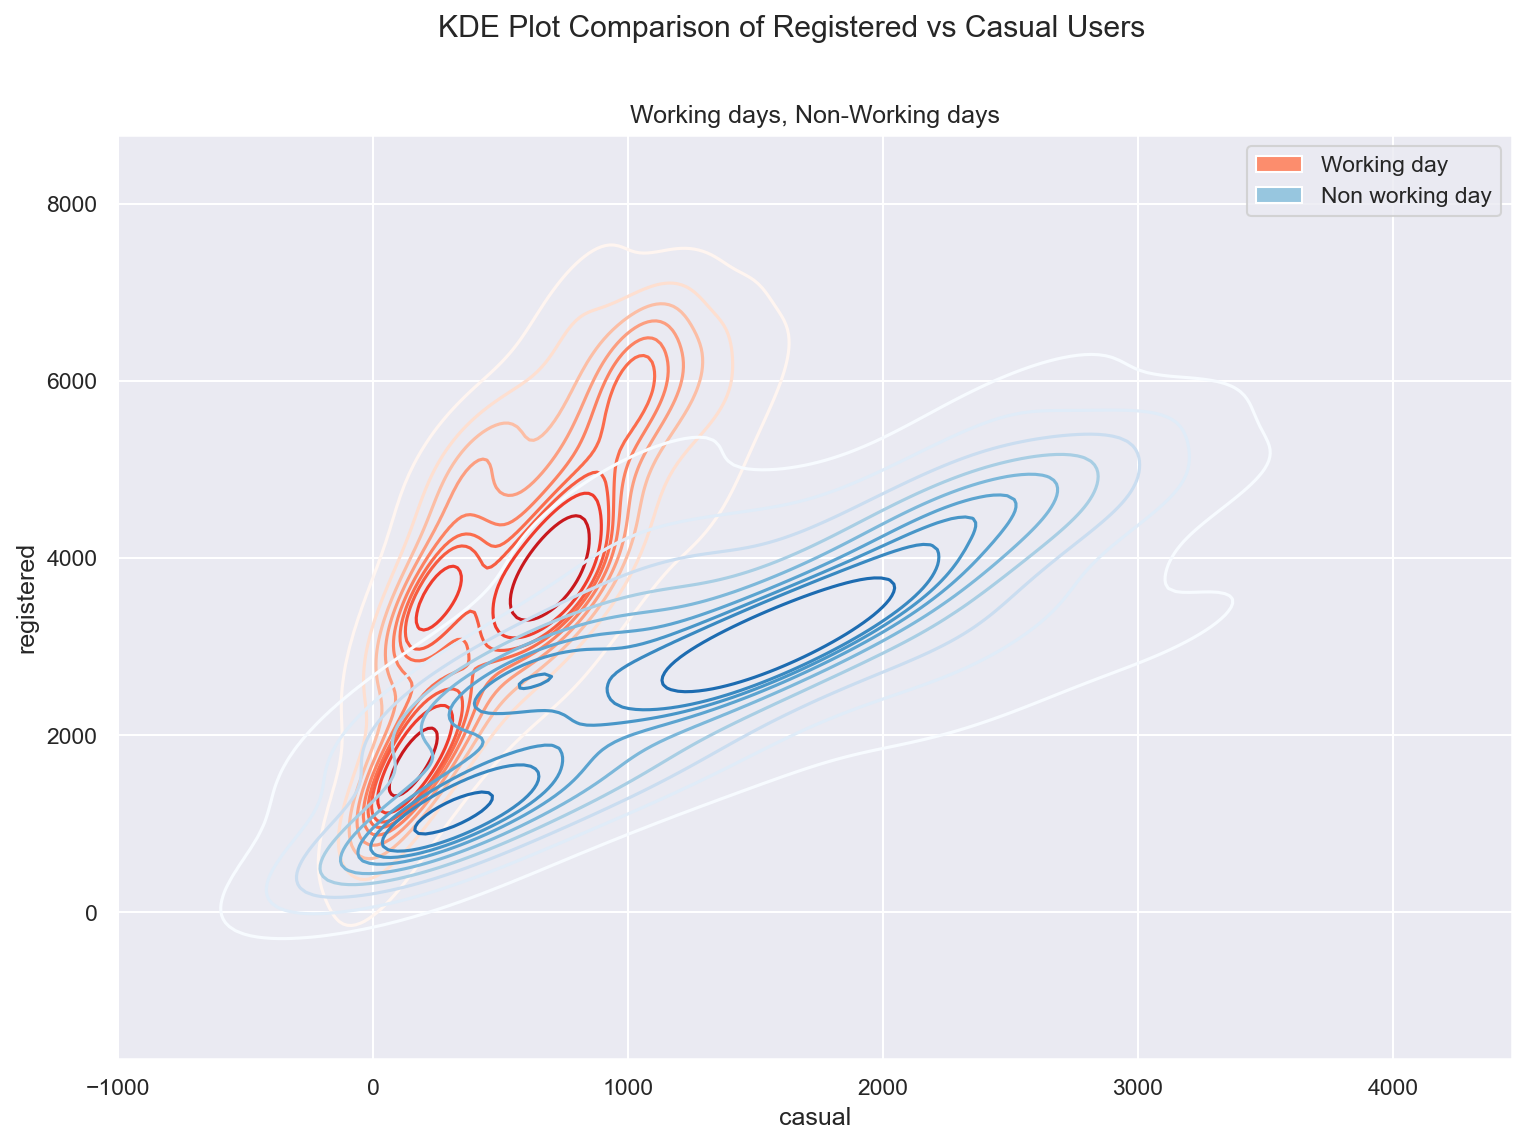

In [13]:
#code to 3a goes here

# Set the figure size for the plot
fig = plt.figure(figsize=(12,8))

# Set 'is_workingday' to a boolean array that is true for all working_days
is_workingday = daily_counts.workingday == 'yes'

# Bivariate KDEs require two data inputs. 
# In this case, we will need the daily counts for casual and registered riders on workdays
# Hint: consider using the .loc method here.
casual_workday = daily_counts.casual.loc[is_workingday]
registered_workday = daily_counts.registered.loc[is_workingday]


# Use sns.kdeplot on the two variables above to plot the bivariate KDE for weekday rides
sns.kdeplot(x=casual_workday, y=registered_workday, color="red",cmap="Reds", fill=False, label="Working day")

not_workingday = daily_counts.workingday == 'no'
# Repeat the same steps above but for rows corresponding to non-workingdays
# Hint: Again, consider using the .loc method here.
casual_non_workday = daily_counts.casual.loc[not_workingday]
registered_non_workday = daily_counts.registered.loc[not_workingday]

# Use sns.kdeplot on the two variables above to plot the bivariate KDE for non-workingday rides
sns.kdeplot(x=casual_non_workday, y=registered_non_workday,color="cyan",cmap="Blues", fill=False, label="Non working day")

handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Working day"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Non working day")]
plt.legend(handles=handles)
plt.suptitle("KDE Plot Comparison of Registered vs Casual Users")
plt.title("Working days, Non-Working days")

#### Question 3b

What additional details can you identify from this contour plot that were difficult to determine from the scatter plot?

It shows indeed high correlation between non and working days, especially for low amount of users (bottom left corner), meaning there are a bunch of records (high concentration in the plot) of days (both working days and non working days) where there were few casual and few registered users together.
It also shows that during non working days there is almost the same amount of casual and registered, due to the (blue) contour spreading diagonally, but the dimension of the y axis (registered users) has wider range, so we still have to look at the proportion


## 4: Joint Plot

As an alternative approach to visualizing the data, construct the following set of three plots where the main plot shows the contours of the kernel density estimate of daily counts for registered and casual users plotted together, and the two "margin" plots (at the top and right of the figure) provide the univariate kernel density estimate of each of these variables. Note that this plot makes it harder see the linear relationships between casual and registered for the two different conditions (working day vs. non-working day).

**Hints (updated)**:
* The [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) has examples that may be helpful.
* Take a look at `sns.jointplot` and its `kind` parameter.
* `set_axis_labels` can be used to rename axes on the contour plot.

**Note**:
* At the end of the cell, we called `plt.suptitle` to set a custom location for the title.
* We also can call `plt.subplots_adjust(top=0.9)` in case your title overlaps with your plot.

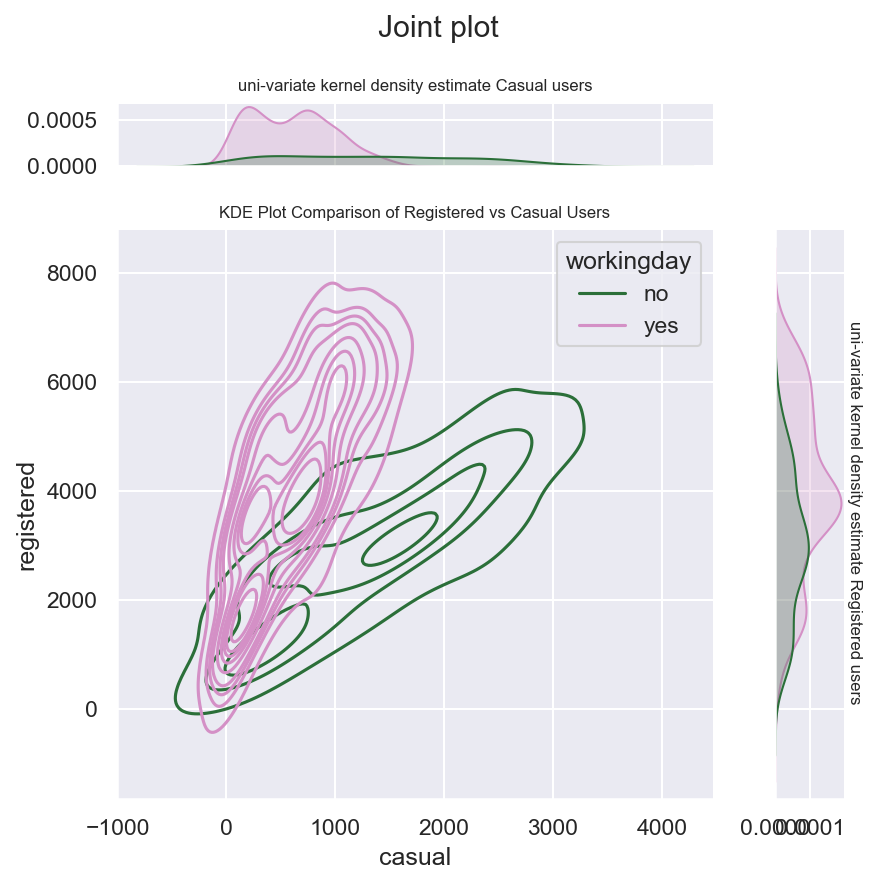

In [14]:
#code for 4 goes here
sns.set_palette("cubehelix", n_colors=2, color_codes=True)

# here is not clear what plotted together is supposed to mean...
# either plot the kde of grouped data, or plot both together as we just did before
# anyway the hue variable is what determines which option of the two to plot
g = sns.jointplot(data=daily_counts,x="casual", y="registered", hue="workingday", kind="kde",
              marginal_ticks=True, marginal_kws={'fill':True})

# fanciness and titles
plt.suptitle("Joint plot")
plt.title("KDE Plot Comparison of Registered vs Casual Users", fontsize=8)
g.ax_marg_y.grid('on')
g.ax_marg_x.grid('on')
g.ax_marg_x.set_title("uni-variate kernel density estimate Casual users", fontsize=8)
g.ax_marg_y.set_title("uni-variate kernel density estimate Registered users", rotation=-90, x=1.15, y=0.15, fontsize=8)
plt.subplots_adjust(top=0.9)
plt.tight_layout()

---
## 5: Understanding Daily Patterns

### Question 5

#### Question 5a
Let's examine the behavior of users by plotting the average number of users for each hour of the day over the **entire dataset**, stratified by user type. Here, two line plots in the same figure should be okay (pay attention to proper labeling).


Text(0.5, 1.0, 'Casual, Registered')

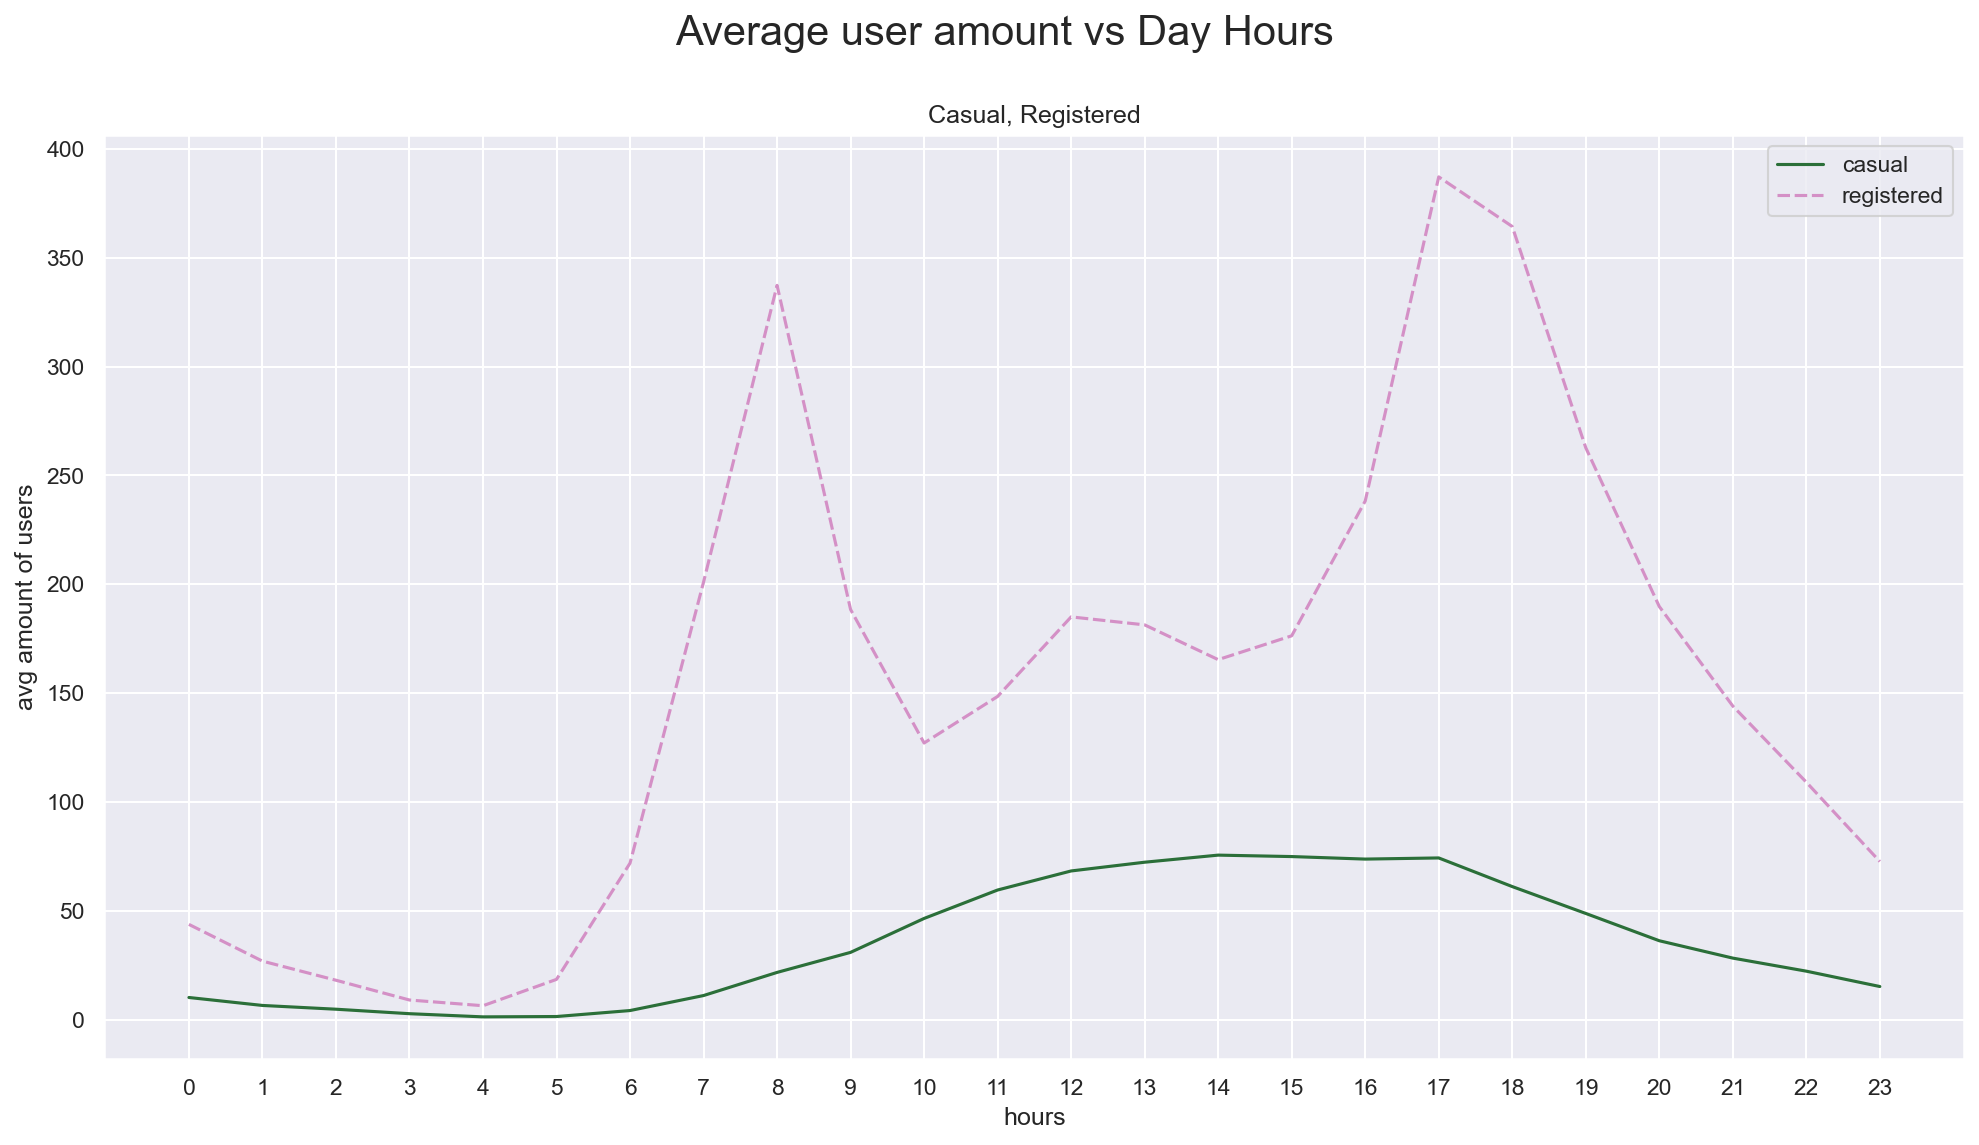

In [15]:
#answer to 5a goes here
# group entries by hour and gather desired columns
daily_behaviour = full.groupby("hr").mean(numeric_only=True).get(["casual","registered"])
# plot line distributions
f6 = sns.lineplot(data=daily_behaviour)
# set labels and ticks every hour
f6.set(xlabel="hours", ylabel="avg amount of users", xticks=np.arange(0,24));
plt.suptitle("Average user amount vs Day Hours", fontsize=20)
plt.title("Casual, Registered")

#### Question 5b

What can you observe from the plot?  Hypothesize about the meaning of the peaks in the registered users' distribution.

In my opinion the peaks in the registered users distribution are determined by the users who make a consistent use of the app, for purposes such as work / school, indeed we can see the peaks are around 7am-9am and between 4pm-7pm  which are usually the hours of the day when people get to or get out from work/ school.
The casual users distribution looks more uniform, with a mean peek around 12am-6pm which ideally are the hours of the day when tourists get to hang out in the city and maybe try to find a transportation vehicle.

---
## 6: Exploring Users and Weather

Now let's examine how the weather is affecting user' behavior. First let's look at how the proportion of casual user changes as weather changes.

### Question 6

#### Question 6a
Create a new column `prop_casual` in the `full` DataFrame representing the proportion of casual users out of all users.

In [16]:
#answer to 6a goes here
full["prop_casual"] = divide(full["casual"], full["cnt"])
full.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prop_casual
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1,0.000000


#### Question 6b
In order to examine the relationship between proportion of casual users and temperature, we can create a scatterplot using `sns.scatterplot`. We can even use color/hue to encode the information about day of week. Run the cell below (or adapt it if you have renamed any variables) and then comment on its explainability.

**Hint**: You will need to set the `data`, `x`, `y`, and `hue` in the `sns.scatterplot` call.

Text(0, 0.5, 'Casual users ratio')

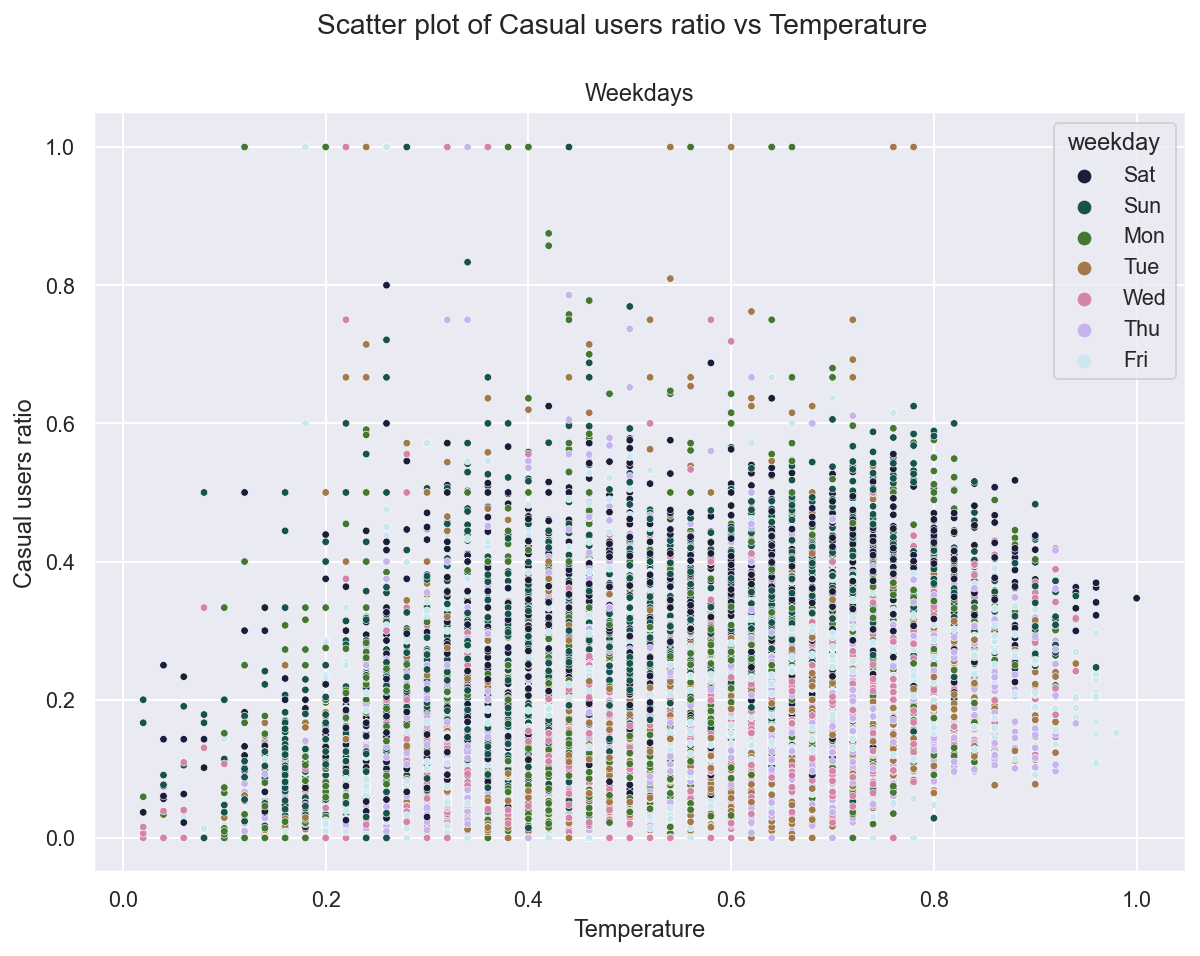

In [17]:
sns.set_palette("cubehelix", n_colors=7, color_codes=True)
plt.figure(figsize=(10, 7), dpi=141)
# scatter plot with hue
sns.scatterplot(data=full, x="temp", y="prop_casual", hue="weekday", s=(15  / 2. * 72./141) ** 2)  # marker size
# add titles and labels
plt.suptitle("Scatter plot of Casual users ratio vs Temperature")
plt.title("Weekdays")
plt.xlabel("Temperature")
plt.ylabel("Casual users ratio")

How would you comment on this figure? Mention any problems you see. How would you think of approaching this problem?

Definitely over plotted, can barely understand the spread of the data for any day of interest, does not work even by reducing the size of the scatters.
The only way to solve this is to plot fewer data, in this case probably we should plot days separately (in different plots)
Or maybe plot these values in a different way (by changing the size of a marker with the value, or in tiles styled way)


A better approach is to use local smoothing. The basic idea is that for each x value, we compute some sort of representative y value that captures the data close to that x value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. An example is below. The green curve shown is a smoothed version of the scatterplot.

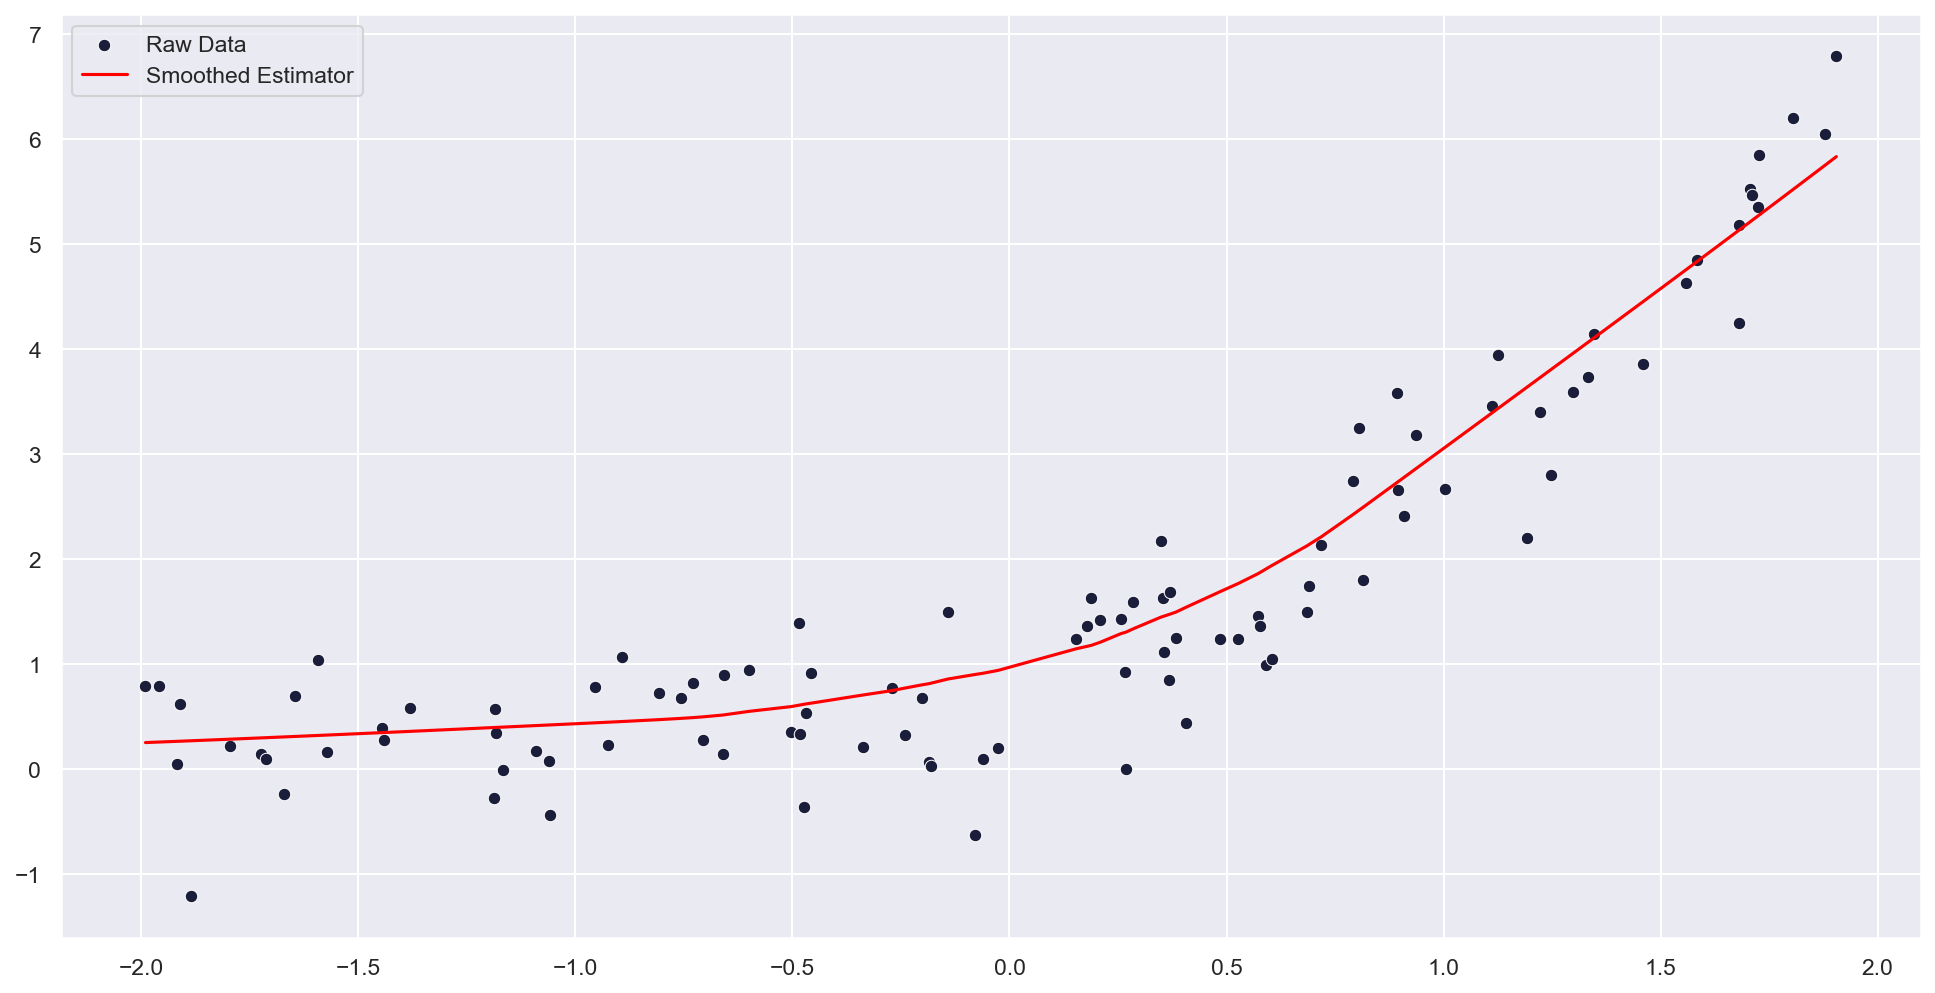

In [18]:
#updated 13/2
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2)
yobs = np.exp(xobs) + np.random.randn(100) / 2.0
sns.scatterplot(x=xobs, y=yobs, label="Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(x=xobs, y=ysmooth, label="Smoothed Estimator", color='red')
plt.legend();

In our case with the users' data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual users.

You should use [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) just like the example above. Unlike the example above, plot ONLY the lowess curve. Do not plot the actual data, which would result in overplotting. For this problem, the simplest way is to use a loop.

**Hints:** 
* Start by just plotting only one day of the week to make sure you can do that first.

* The `lowess` function expects y coordinate first, then x coordinate. You should also set the `return_sorted` field to `False`.

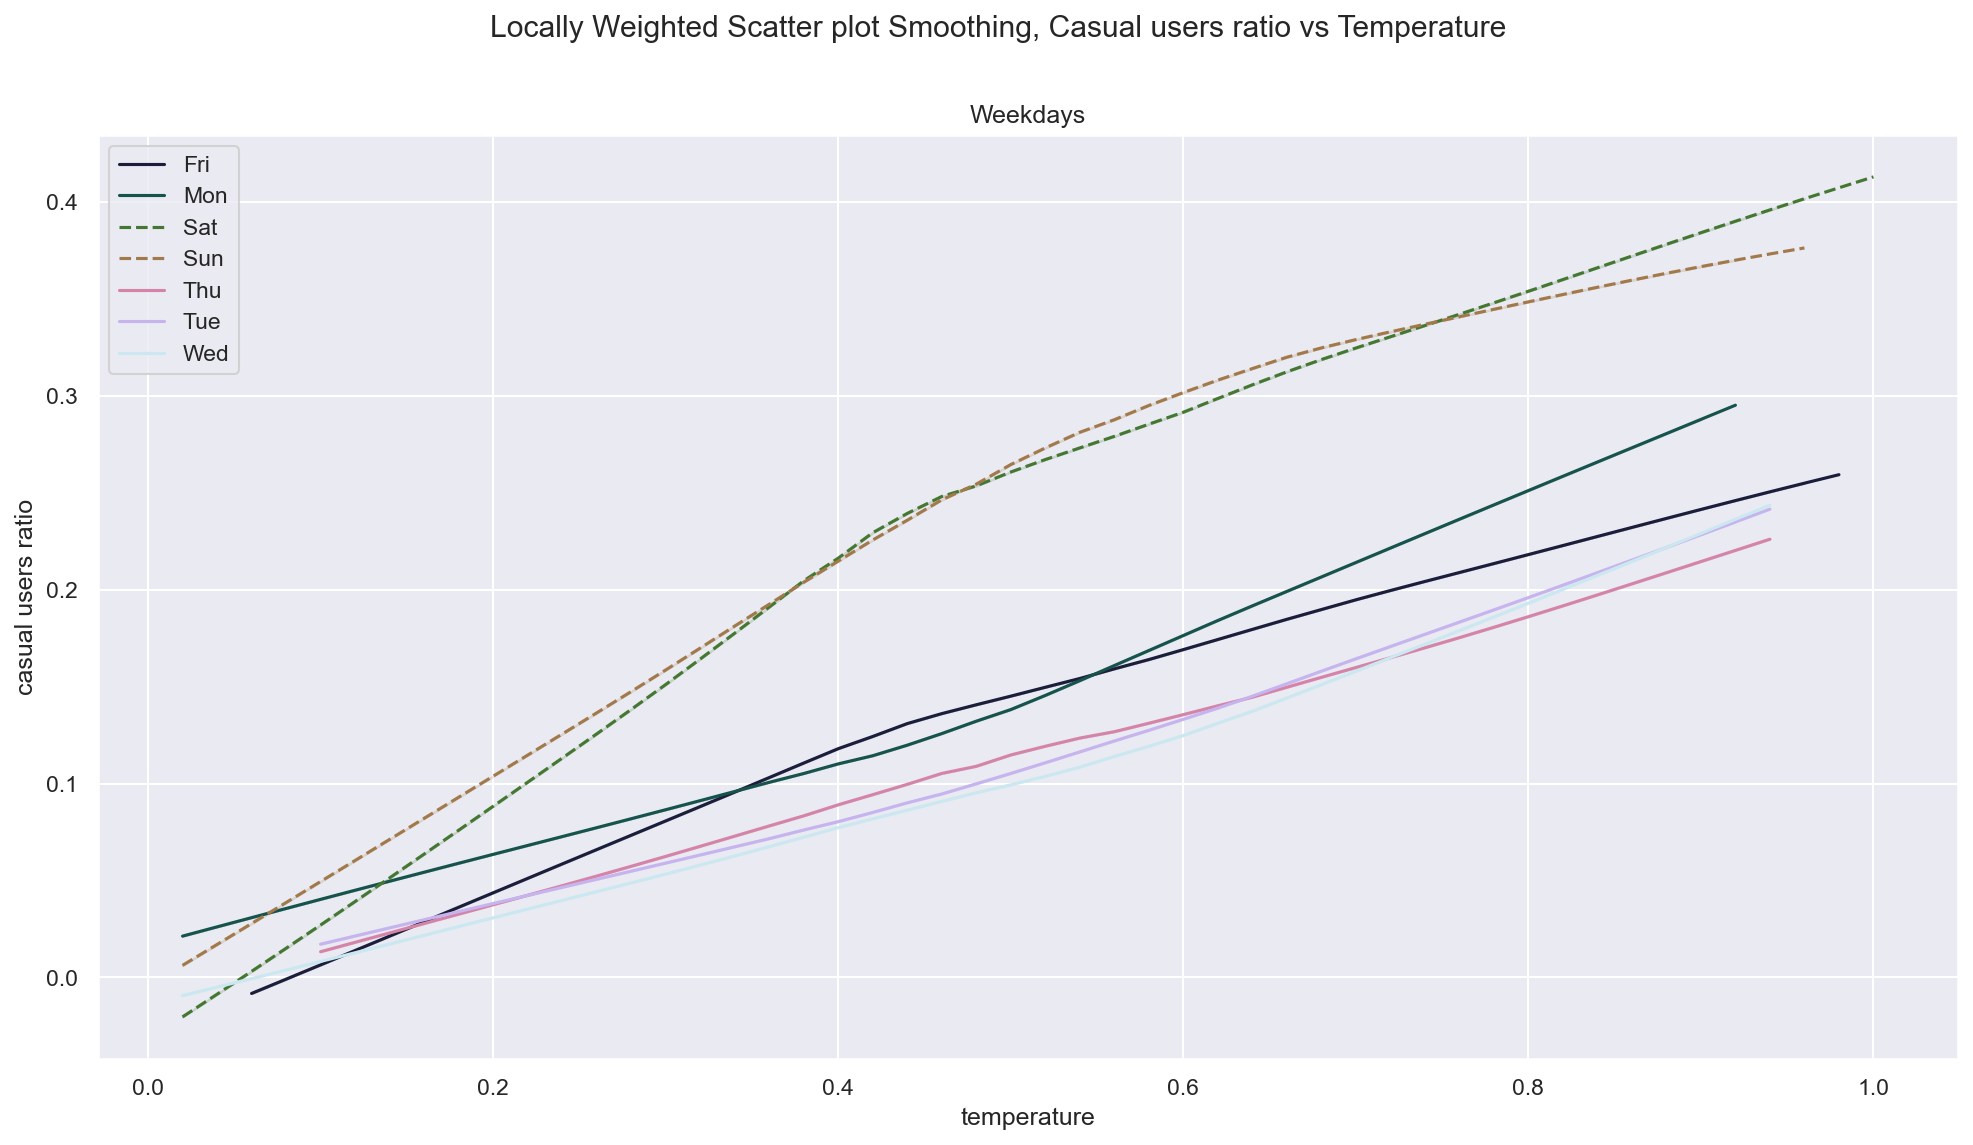

In [19]:
#your code for 6b
from statsmodels.nonparametric.smoothers_lowess import lowess

# sort the weekdays and get the indexes
for day in sorted(full['weekday'].unique()):
    # mask to filter entries corresponding to that day
    d = full[full['weekday'] == day]
    # evaluate lowess curve y smoothed
    ysmooth = lowess(d['prop_casual'], d['temp'], return_sorted=False)
    # plot current day line dashed if workingday
    sns.lineplot(x=d['temp'], y=ysmooth, label=f"{day}", linestyle=('dashed' if d["workingday"].unique()[0] == 'no' else 'solid'))

# add titles and labels
plt.suptitle("Locally Weighted Scatter plot Smoothing, Casual users ratio vs Temperature")
plt.title("Weekdays")
plt.ylabel('casual users ratio')
plt.xlabel('temperature')
plt.show()

### Question 6c

What do you see from the curve plot? How is `prop_casual` changing as a function of temperature? Do you notice anything else interesting?

There is clearly an increase of the ratio when the temperature is higher.
This does not mean that there are more casual users than registered because this ratio never reaches over 0.5


### Question 6d

Based on the data you have explored (distribution of users, daily patterns, weather, additional data/information you have seen), do you think this scooter user info should be realistically scaled across other cities in Italy. Why or why not? Justify your answer as a data scientist.

As an Italian I can tell Rome is a very touristic city, probably the one which attracts the most tourists out of all cities.
From the analysis we have found that:
there is a big impact of casual users and high correlation with good weather, weekend days and touristic times of the day, therefore I personally would not recommend using this dataset to model other cities in Italy because it might be biased by all tourists records, and it would not scale well with less touristic areas and cities.


### Question 7a. Compute Something Interesting

Play with the data and try to compute something interesting about the data. Please try to use at least one of groupby, pivot, or merge (or all of the above).  

Please show your work in the cell below and describe in words what you found in the same cell. This question will be graded leniently but good solutions may be used to create future clinics.

#### Grading ####

Since the question is more open ended, we will have a more relaxed rubric, classifying your answers into the following three categories:

- **Great** (4 points): Uses a combination of pandas operations (such as groupby, pivot, merge) to answer a relevant question about the data. The text description provides a reasonable interpretation of the result.
- **Passing** (1-3 points): Computation is flawed or very simple. The text description is incomplete but makes some sense.
- **Unsatisfactory** (0 points): No computation is performed, or a computation with completely wrong results.


***Put your code in one cell below and your explanation in a markdown cell below***

In [20]:
#your code for 7a
# rename stuff
dict_seasons = {'yr':{0:'2011', 1:'2012'},
                'season':{1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'},
                'mnth':{1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                         7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}}
full = full.replace(dict_seasons)

In [27]:
# create groups
year = full.groupby('yr').agg({'yr':'first', 'casual':'sum', 'registered':'sum'})
sea = full.groupby(['yr', 'season']).agg({'season': 'first', 'yr': 'first', 'casual': 'sum', 'registered': 'sum'})
# mask filter
mask = lambda s,x : s['yr'] == x
# replace with ratios
sea.loc[mask(sea, '2011'), 'casual'] = sea[mask(sea, '2011')]['casual'] / year[mask(year, '2011')]['casual']
sea.loc[mask(sea, '2011'), 'registered'] = sea[mask(sea, '2011')]['registered'] / year[mask(year, '2011')]['registered']
sea.loc[mask(sea, '2012'), 'casual'] = sea[mask(sea, '2012')]['casual'] / year[mask(year, '2012')]['casual']
sea.loc[mask(sea, '2012'), 'registered'] = sea[mask(sea, '2012')]['registered'] / year[mask(year, '2012')]['registered']
# there obviously is a better,fancier,more elegant way to compute this but my stupid ass didn't manage to find it
sea

season    yr    casual  registered
yr   season                                    
2011 Fall      Fall  2011  0.386043    0.325428
     Spring  Spring  2011  0.086652    0.129134
     Summer  Summer  2011  0.313704    0.270925
     Winter  Winter  2011  0.213600    0.274513
2012 Fall      Fall  2012  0.350465    0.304489
     Spring  Spring  2012  0.105152    0.168178
     Summer  Summer  2012  0.337902    0.265433
     Winter  Winter  2012  0.206481    0.261900

We want to further examine whether there is some significance in the hypothesis that the Casual user registered records are actually affected by the high number of tourists which is present in Rome (due to the fact that not all Italian cities are that much touristic, might be understandable to think that, and also could play a sad role when scaling this model to others).
Therefore, it might be a good idea to check whether seasons have effects on the number of casual users, following the reasoning that there might be more tourists during some times of the year rather than others.
To answer this question we use the plots in 7b rather than these values.

### Question 7b. Create some more cool visualizations!

Play with the data, and try to produce some visualizations to answer one question that you find interesting regarding the data. You might want to use `merge`/`groupby`/`pivot` to process the data before creating visualizations.

Please show your work in the cells below (feel free to use extra cells if you want), and describe in words what you found. This question will be graded leniently, but good solutions may be used to create future clinic problems. 


#### Grading ####

Since the question is more open ended, we will have a more relaxed rubric, classifying your answers into the following three categories:

- **Great** (4 points): The chart is well designed, and the data computation is correct. The text written articulates a reasonable metric and correctly describes the relevant insight and answer to the question you are interested in.
- **Passing** (1-3 points): A chart is produced but with some flaws such as bad encoding. The text written is incomplete but makes some sense.
- **Unsatisfactory** (0 points): No chart is created, or a chart with completely wrong results.

You should have the following in your answers:
* a few visualizations; Please limit your visualizations to 5 plots.
* a few sentences (not too long please!)

***Put your code in one cell below and your explanation in a markdown cell below***

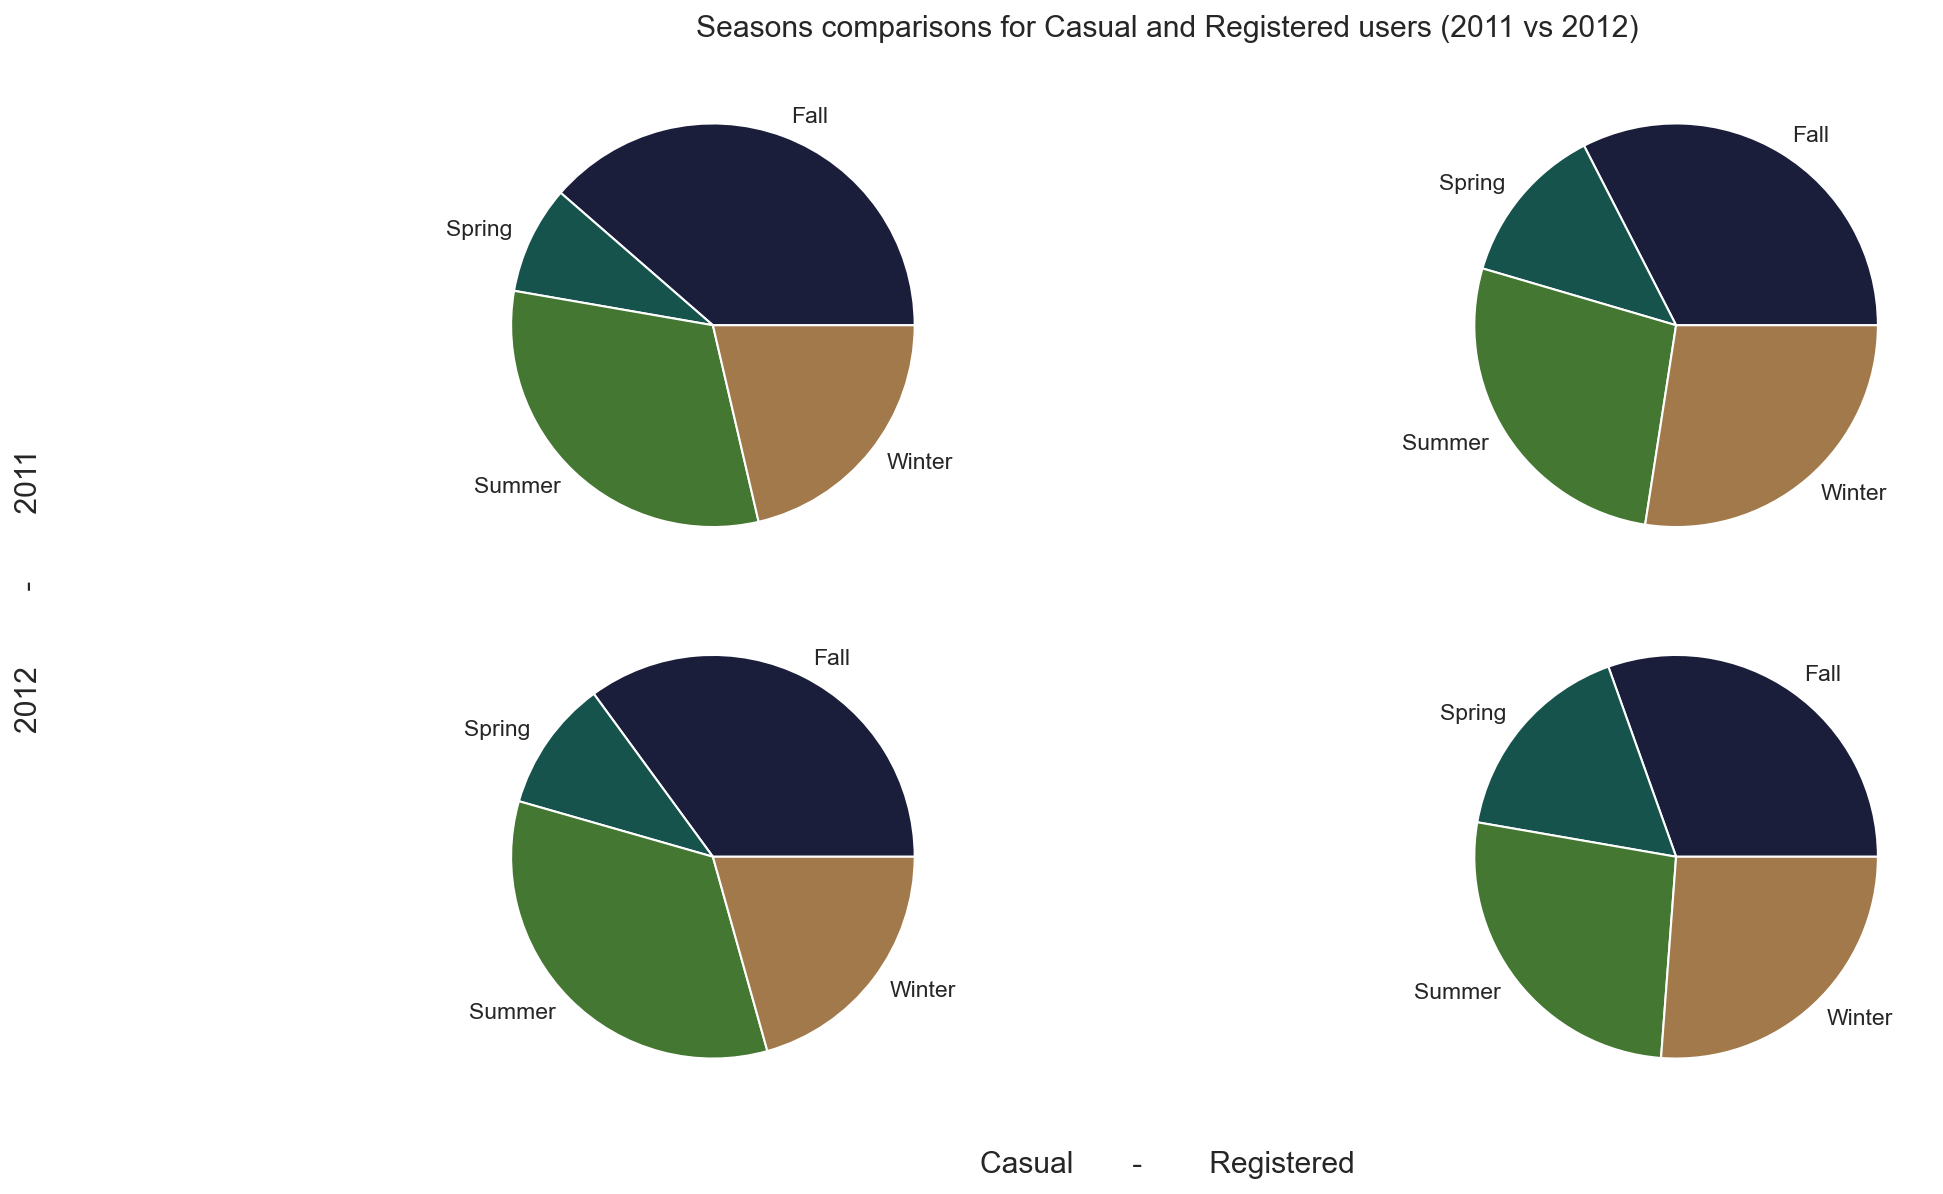

In [22]:
#your code for 7b
seasons = sea['season'].unique()
fig = plt.figure()
ax1 = plt.subplot2grid((2,2), (0,0)) ; plt.pie(sea.loc[mask(sea, '2011'), 'casual'],labels=seasons)
ax2 = plt.subplot2grid((2,2), (0,1)) ; plt.pie(sea.loc[mask(sea, '2011'), 'registered'],labels=seasons)
ax3 = plt.subplot2grid((2,2), (1,0)) ; plt.pie(sea.loc[mask(sea, '2012'), 'casual'],labels=seasons)
ax4 = plt.subplot2grid((2,2), (1,1)) ; plt.pie(sea.loc[mask(sea, '2012'), 'registered'],labels=seasons)
fig.supxlabel("Casual       -        Registered")
fig.supylabel("2012         -        2011")
fig.suptitle("Seasons comparisons for Casual and Registered users (2011 vs 2012)")
plt.tight_layout()

Here we want to analyse the influence of season within the context of casual vs registered users, thought would be helpful to have a ratio instead of numbers and having pie charts visibly helps to get a grasp of these ratios.
According to this [`website`]("https://travel.usnews.com/Rome_Italy/When_To_Visit/") we can indeed notice there is an expected high affluence of tourists during summer and fall seasons, which explains why the bigger slices of the Casual users pies are given to these two seasons.
While, for the Registered users we can see in both years, all seasons are almost uniformly spread, except for Spring which is in both cases the smallest slice out of all.
Furthermore, the year comparison helps us understand that these ratios aren't just coincidence but that this pattern similarly repeats in 2011 and in 2012.

It is therefore plausible to assume, as mentioned earlier and further confirmed by these plots, that a big part of Casual users may be due to the high number of tourists which are present in Rome.